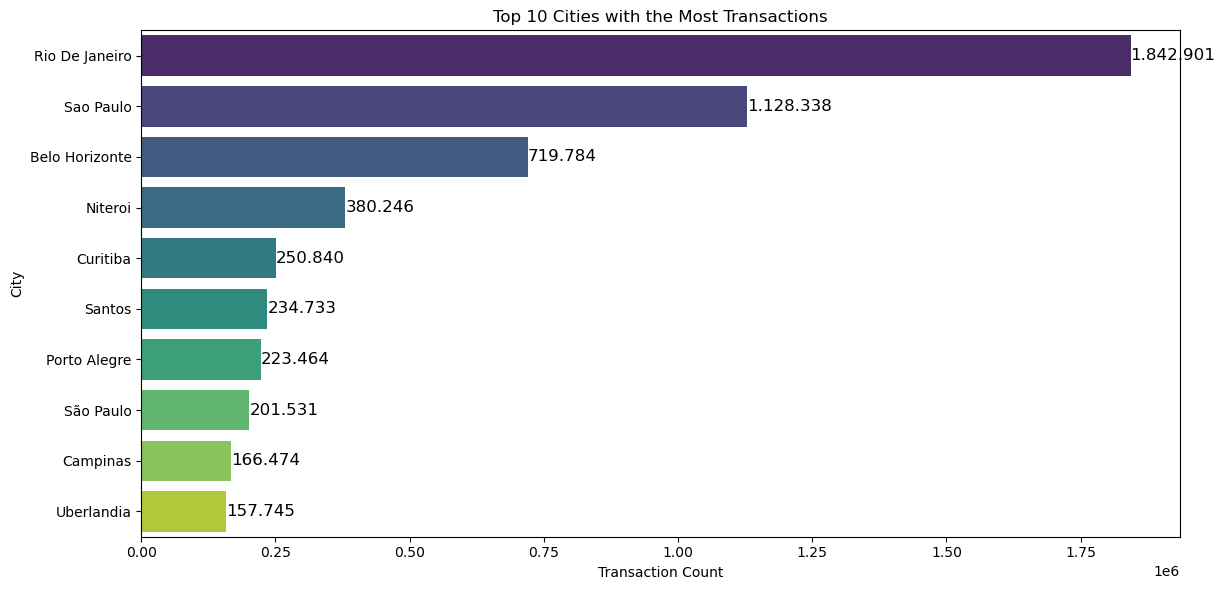

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import locale

# Set the locale to format numbers with thousands separator
locale.setlocale(locale.LC_ALL, '')

# Read data from CSV files
customers = pd.read_csv('olist_order_customer_dataset.csv')
orders = pd.read_csv('olist_order_dataset.csv')
geolocation = pd.read_csv('olist_geolocation_dataset.csv')

# Merge data from multiple tables
merged_data = pd.merge(customers, orders, left_on='customer_id', right_on='customer_id')
merged_data = pd.merge(merged_data, geolocation, left_on='customer_zip_code_prefix', right_on='geolocation_zip_code_prefix')

# Convert city names to title case (capitalized)
merged_data['geolocation_city'] = merged_data['geolocation_city'].str.title()

# Calculate transaction counts per city
city_transaction_counts = merged_data['geolocation_city'].value_counts().head(10)

# Create a ranking of the top 10 cities with the most transactions
ranking = city_transaction_counts.reset_index()
ranking.columns = ['City', 'Transaction Count']

# Visualize the data
plt.figure(figsize=(12, 6))
bar_plot = sns.barplot(x='Transaction Count', y='City', data=ranking, palette='viridis')
plt.xlabel('Transaction Count')
plt.ylabel('City')
plt.title('Top 10 Cities with the Most Transactions')
plt.xticks(rotation=0)
plt.tight_layout()

# Add labels with formatted transaction counts on top of each bar
for index, row in ranking.iterrows():
    formatted_count = locale.format_string("%d", row['Transaction Count'], grouping=True)
    bar_plot.text(row['Transaction Count'], index, formatted_count, va='center', fontsize=12, color='black')

plt.show()

In [10]:
# Print Transaction Data
print("Top 10 Cities with the Most Transactions:")
print(ranking.to_string(index=False))

Top 10 Cities with the Most Transactions:
          City  Transaction Count
Rio De Janeiro            1842901
     Sao Paulo            1128338
Belo Horizonte             719784
       Niteroi             380246
      Curitiba             250840
        Santos             234733
  Porto Alegre             223464
     São Paulo             201531
      Campinas             166474
    Uberlandia             157745


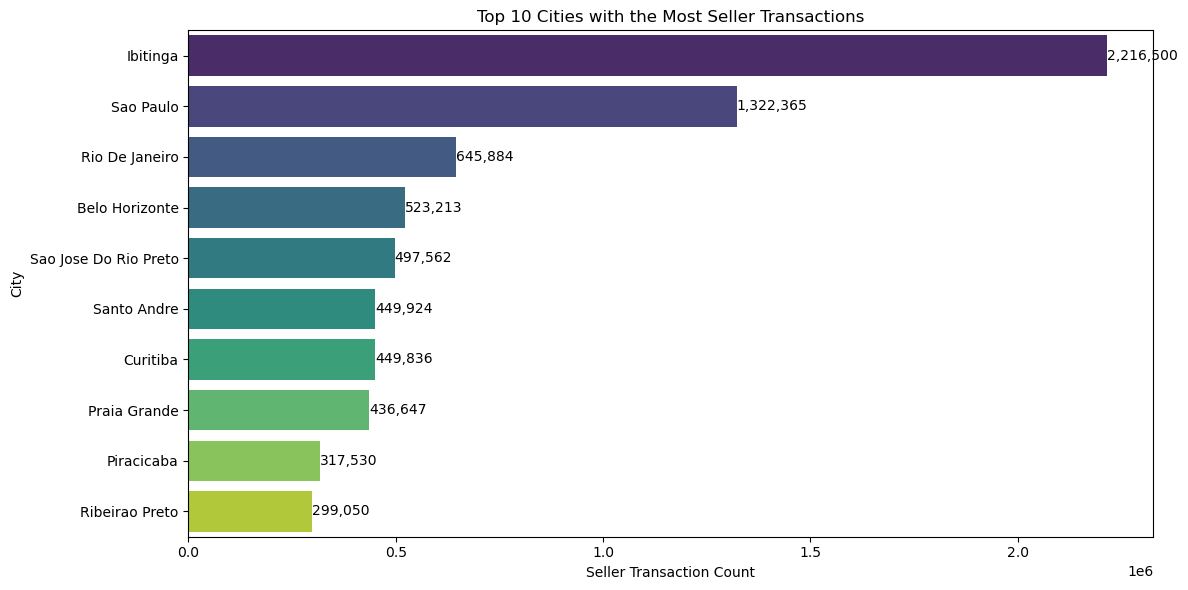

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import locale

# Read data from CSV files
order_items = pd.read_csv('olist_order_items_dataset.csv')
sellers = pd.read_csv('olist_sellers_dataset.csv')
geolocation = pd.read_csv('olist_geolocation_dataset.csv')

# Merge data from multiple tables
merged_data = pd.merge(order_items, sellers, left_on='seller_id', right_on='seller_id')
merged_data = pd.merge(merged_data, geolocation, left_on='seller_zip_code_prefix', right_on='geolocation_zip_code_prefix')

# Calculate transaction counts per city for sellers
city_transaction_counts = merged_data['geolocation_city'].value_counts().head(10)

# Create a ranking of the top 10 cities with the most seller transactions
ranking = city_transaction_counts.reset_index()
ranking.columns = ['City', 'Seller Transaction Count']

# Format city names to title case
ranking['City'] = ranking['City'].str.title()

# Create a function to add thousands separator to labels
def add_thousands_separator(x, pos):
    return locale.format_string('%d', int(x), grouping=True)

# Set locale for formatting
locale.setlocale(locale.LC_ALL, 'en_US.UTF-8')

# Visualize the data
plt.figure(figsize=(12, 6))
bar_plot = sns.barplot(x='Seller Transaction Count', y='City', data=ranking, palette='viridis')
plt.xlabel('Seller Transaction Count')
plt.ylabel('City')
plt.title('Top 10 Cities with the Most Seller Transactions')
plt.xticks(rotation=0)

# Add labels with thousands separator inside each bar
for p in bar_plot.patches:
    width = p.get_width()  # Mendapatkan lebar batang
    plt.text(width, p.get_y() + p.get_height() / 2, add_thousands_separator(width, 0),
             ha='left', va='center', fontsize=10, color='black')

plt.tight_layout()
plt.show()

In [8]:
# Print Seller Transactions Data
print("Top 10 Cities with the Most Seller Transactions:")
print(ranking.to_string(index=False))

Top 10 Cities with the Most Seller Transactions:
                 City  Seller Transaction Count
             Ibitinga                   2216500
            Sao Paulo                   1322365
       Rio De Janeiro                    645884
       Belo Horizonte                    523213
Sao Jose Do Rio Preto                    497562
          Santo Andre                    449924
             Curitiba                    449836
         Praia Grande                    436647
           Piracicaba                    317530
       Ribeirao Preto                    299050
